In [2]:
from StackGP import *
import numpy as np

In [44]:
def binaryError(model, input, response):
    prediction= evaluateGPModel(model, input)
    error = np.mean(np.abs(prediction - response))
    if np.isnan(error) or np.isinf(error) or error > 1 or error < 0: 
        return 0.5
    return min(error, 1 - error)

In [29]:
def and1(a,b):
    return np.logical_and(a, b)
def or1(a,b):
    return np.logical_or(a, b)
def xor1(a,b):
    return np.logical_xor(a, b)
def nand1(a,b):
    return np.logical_not(np.logical_and(a, b))
def nor1(a,b):
    return np.logical_not(np.logical_or(a, b))
def xnor1(a,b):
    return np.logical_not(np.logical_xor(a, b))  
def not1(a):
    return np.logical_not(a)
binaryOps = [and1, or1, xor1, nand1, nor1, xnor1, not1,"pop","pop","pop","pop","pop","pop"]

In [69]:
data= np.array([[0,1,0,0,0,0],[1,0,1,1,0,0]])
response=np.array([1,1,1,1,0,1])

In [40]:
sampleModel=initializeGPModels(2,ops=binaryOps,const=[0,1])[0]
sampleModel

[array([<function xor1 at 0x32cd5eca0>], dtype=object), [1, 0], []]

In [41]:
evaluateGPModel(sampleModel, data)

array([ True,  True,  True,  True])

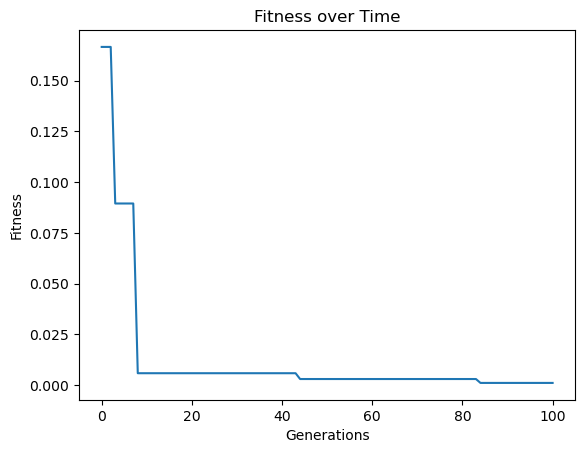

In [70]:
models=evolve(data,response,ops=binaryOps,const=[0,1],modelEvaluationMetrics=[binaryError,stackGPModelComplexity],tracking=True,align=False)

In [71]:
models[0]

[array(['pop'], dtype=object),
 [-0.16566702203615846],
 [0.0009996446305081674, 1]]

In [72]:
evaluateGPModel(models[0], data)

array([-0.16566702, -0.16566702, -0.16566702, -0.16566702, -0.16566702,
       -0.16566702])

In [73]:
binaryError(models[0], data, response)

0.0009996446305081674

In [74]:
out=evaluateGPModel(models[0], data)
np.mean(np.abs(out-response))

0.9990003553694918